In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import mplcursors
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', None)

In [23]:
playoff_data_DF = pd.read_excel('Playoff DataFrame.xlsx')
playoff_data_DF.rename(columns={'Unnamed: 0': 'Player Name'}, inplace = True)
playoff_data_DF

,Player Name,Playoff Games Played,Playoff Points Scored
0,Alaa Abdelnaby,17,38
1,Zaid Abdul-Aziz,18,92
2,Kareem Abdul-Jabbar,237,5762
3,Mahmoud Abdul-Rauf,15,195
4,Tariq Abdul-Wahad,13,68
...,...,...,...
2723,Wang Zhi-zhi,16,30
2724,Paul Zipser,6,44
2725,Ante Zizic,8,13
2726,Ivica Zubac,21,155


In [45]:
"""
All of the code in this cell is used to make the 'caption' more descriptive when you hover the mouse over a
certain point on the graph.

Rather than just saying the name of the player, it also includes their playoff scoring rank as well as their 
total playoff points scored.
"""

# We add the column 'graph_info' so that we can make changes to it while not changing 'Player Name'
playoff_data_DF['Graph Info'] = playoff_data_DF['Player Name']

# Making our Playoff Points Scored column from the DataFrame into a list titled 'pts'
pts = playoff_data_DF['Playoff Points Scored'].tolist()

# Ranking the top scorers (while maintaining the indexes of list 'pts') to a new list titled 'rank_list'
rank_pts = [1] * len(pts)
for i, x in enumerate(sorted(range(len(pts)), key=lambda y: pts[y])):
    rank_pts[x] = i

scoring_rank = [abs(len(rank_pts) - i) for i in rank_pts]

# Adding each players scoring rank and total points to their 'Player Name' column in our DataFrame so that 
# they will show up when we hover our mouse over the scatter plot
ct = 0

for i in playoff_data_DF.index:
    
    playoff_data_DF.loc[i, 'Graph Info'] = str(scoring_rank[ct]) + '.  ' + playoff_data_DF.loc[i]['Graph Info'] + ' - ' + playoff_data_DF.loc[i]['Playoff Points Scored'].astype(str) + ' pts'
    
    ct += 1

# Reset index
playoff_data_DF.reset_index(drop=True, inplace = True)

# DataFrame with completed (Graph Info) column (rank on playoff scoring list, name, total playoff points)
playoff_data_DF

,Player Name,Playoff Games Played,Playoff Points Scored,Graph Info
0,Alaa Abdelnaby,17,38,1672. Alaa Abdelnaby - 38 pts
1,Zaid Abdul-Aziz,18,92,1285. Zaid Abdul-Aziz - 92 pts
2,Kareem Abdul-Jabbar,237,5762,3. Kareem Abdul-Jabbar - 5762 pts
3,Mahmoud Abdul-Rauf,15,195,925. Mahmoud Abdul-Rauf - 195 pts
4,Tariq Abdul-Wahad,13,68,1423. Tariq Abdul-Wahad - 68 pts
...,...,...,...,...
2723,Wang Zhi-zhi,16,30,1745. Wang Zhi-zhi - 30 pts
2724,Paul Zipser,6,44,1596. Paul Zipser - 44 pts
2725,Ante Zizic,8,13,2009. Ante Zizic - 13 pts
2726,Ivica Zubac,21,155,1052. Ivica Zubac - 155 pts


<IPython.core.display.Javascript object>


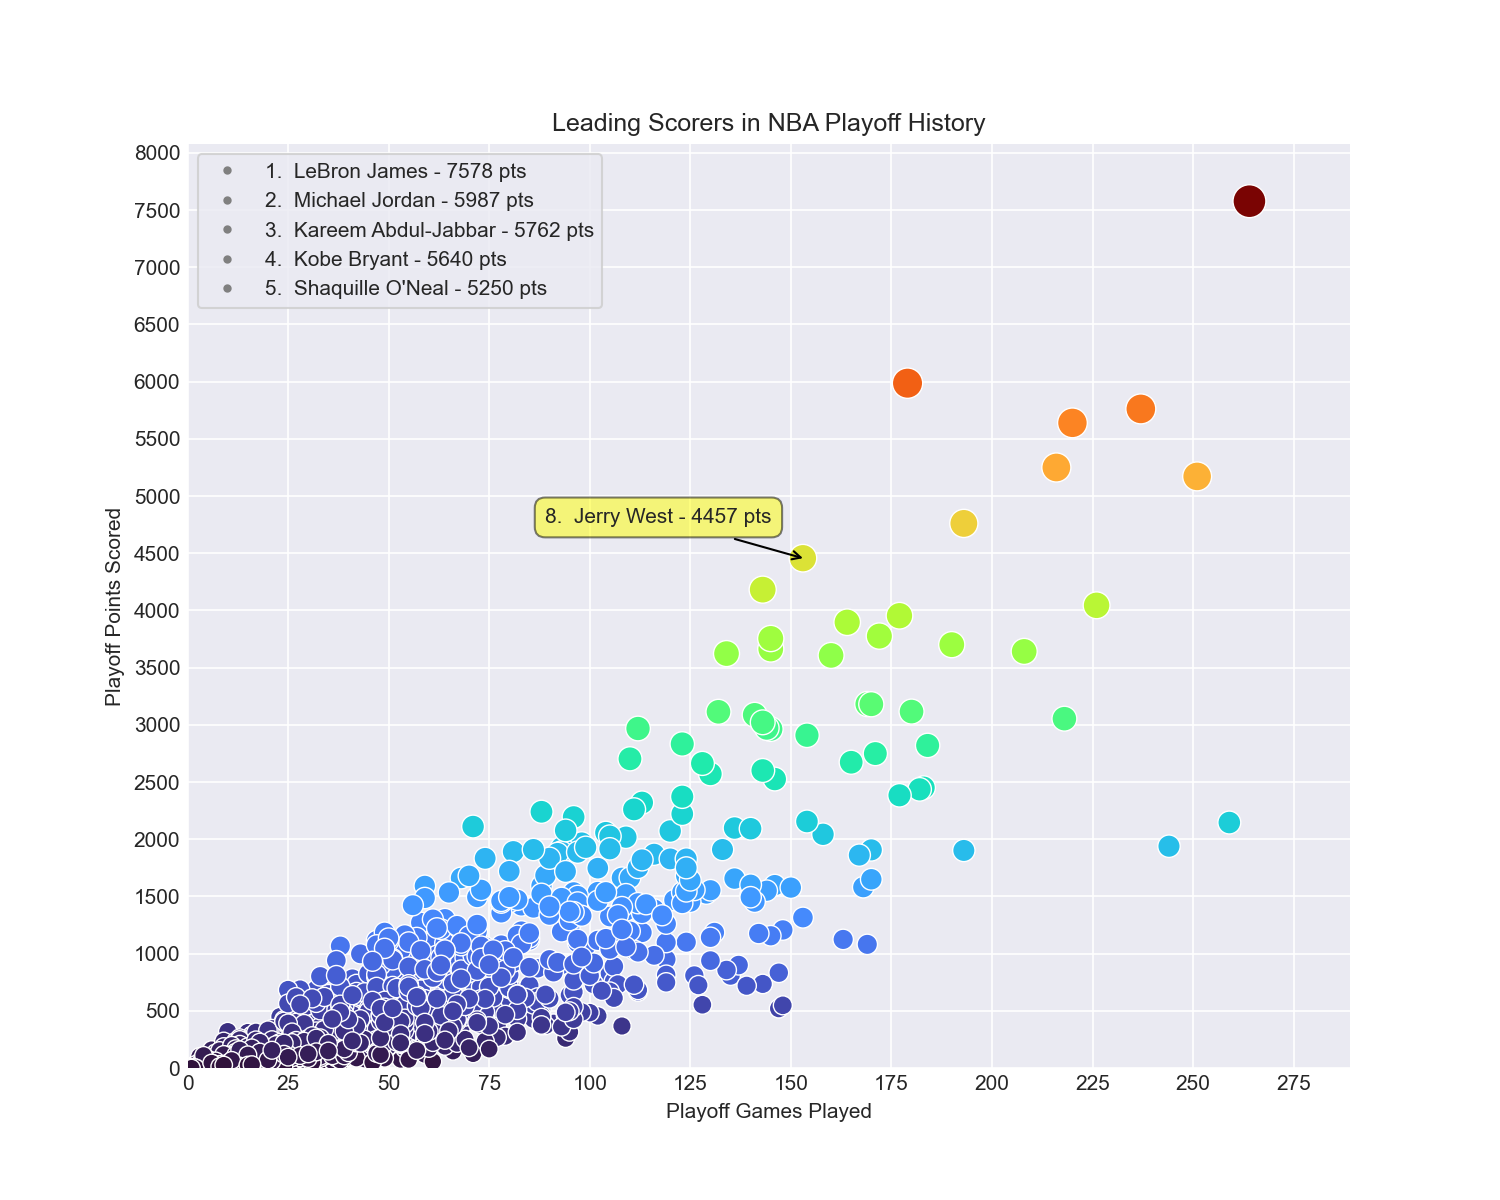

In [50]:
# Magic command to create a live interactive graph (below) 
# This also allows us to zoom in on various subsets of our graph and get a much closer look at each individual
# point as their are almost 3k many of which are stacked on top of each other

%matplotlib notebook

def graph_it(plot_data):
    
# Styling scatter plot
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(10, 8))
    
    markers = None
    
    sns.scatterplot(
        data = plot_data, x = 'Playoff Games Played', y = 'Playoff Points Scored', hue = 'Playoff Points Scored',
        palette = 'turbo', size = 'Playoff Points Scored', sizes = (70, 250), legend = 'auto')

    plt.xticks(np.arange(0, playoff_data_DF['Playoff Games Played'].max() + 50, 25))
    plt.yticks(np.arange(0, playoff_data_DF['Playoff Points Scored'].max() + 500, 500))
    plt.title('Leading Scorers in NBA Playoff History')

    plt.xlim(0, playoff_data_DF['Playoff Games Played'].max() + 25)
    plt.ylim(0, playoff_data_DF['Playoff Points Scored'].max() + 500)
    

    """
    I found the following lambda function online and modified it to show the index value when you hover over a
    point rather than the x,y coordinates.  This way, whenever you hover over a point in the live graph below it will
    tell you which player that point represents.
    """

    mplcursors.cursor().connect(
        "add", lambda sel: sel.annotation.set_text(playoff_data_DF['Graph Info'][sel.target.index]))
    
    
    """
    The following code is all for our graph legend.
    """

    custom = [Line2D([], [], marker='.', color='gray', linestyle='None'),
             Line2D([], [], marker='.', color='gray', linestyle='None'),
             Line2D([], [], marker='.', color='gray', linestyle='None'),
             Line2D([], [], marker='.', color='gray', linestyle='None'),
             Line2D([], [], marker='.', color='gray', linestyle='None')]
    
    
    leg = playoff_data_DF[['Graph Info', 'Playoff Points Scored']].sort_values('Playoff Points Scored', ascending = False).head(5)
    
    plt.legend(custom, [i for i in leg['Graph Info']], loc = 'upper left', frameon = True)
    leg_gone = plt.gca().get_legend()
    
    counter = 0
    while counter < 5:
        leg_gone.legendHandles[counter].set_visible(True)
        counter += 1
        
    
    return plt.show()

graph_it(playoff_data_DF)

> ### Though our legend only includes the top 5, we can get the rank, name, and total points of anyone on the graph by hovering over their point.

<IPython.core.display.Javascript object>


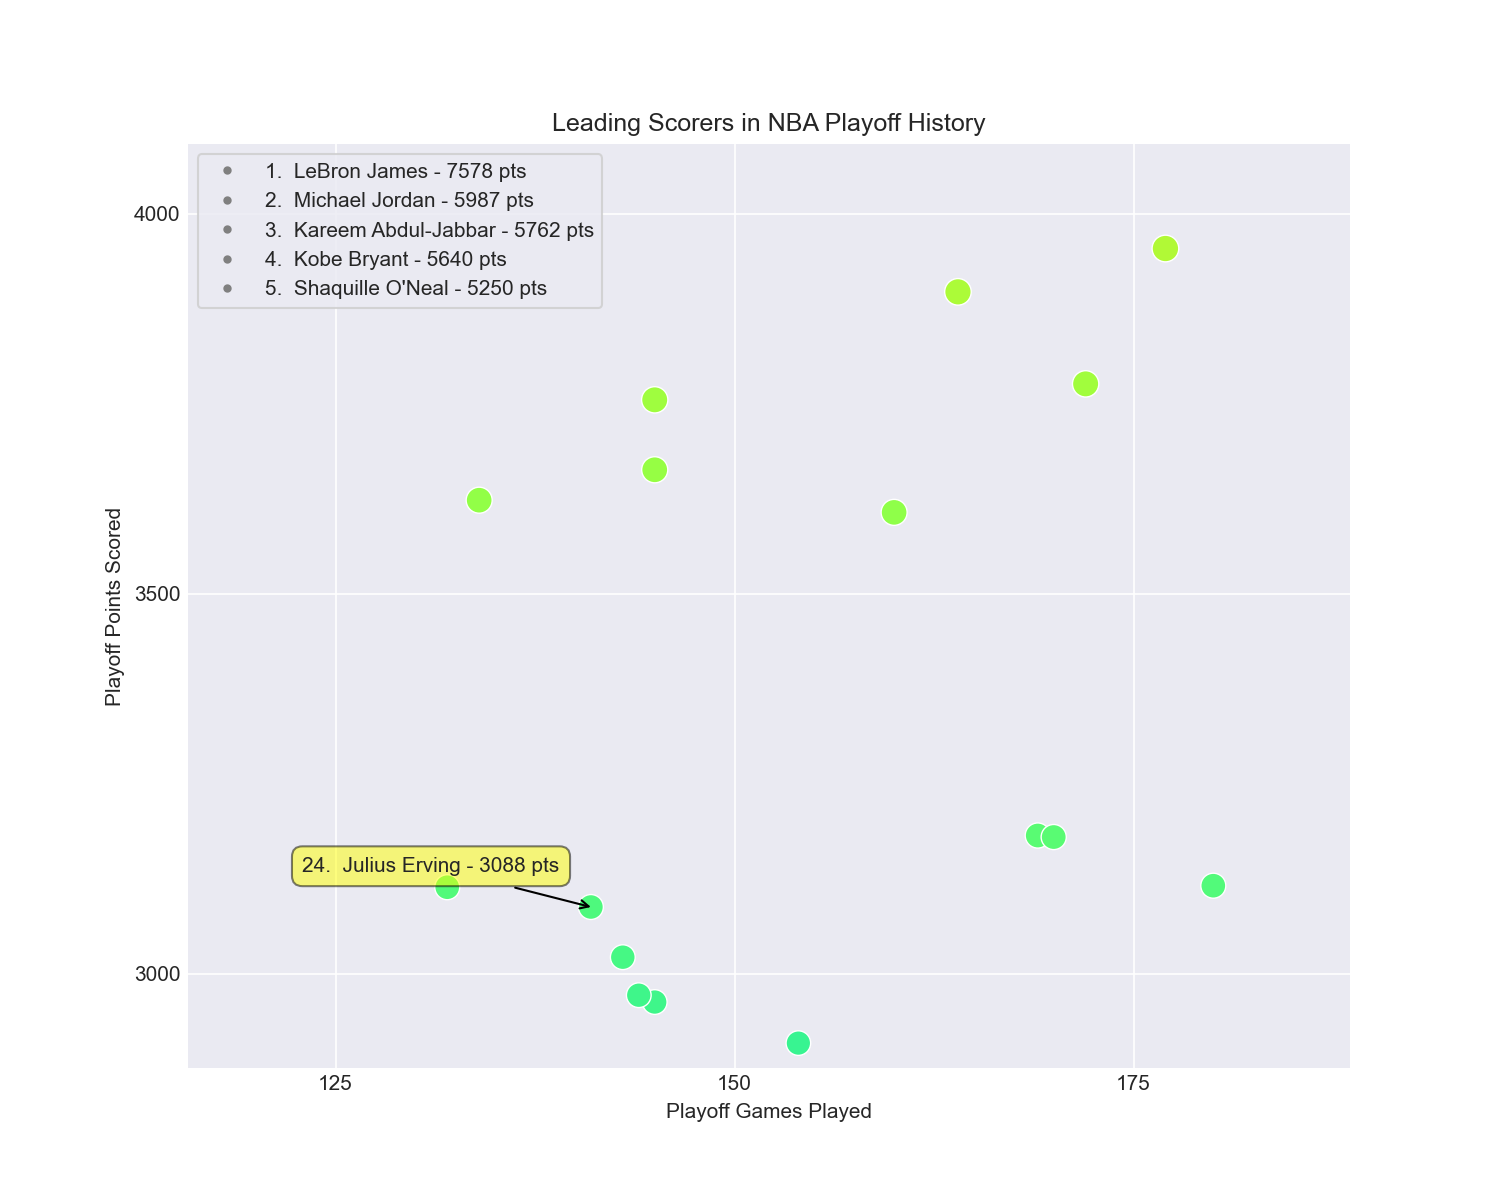

In [51]:
graph_it(playoff_data_DF)

> ### By using our zoom in feature, we can see that this middle area of the graph, which when zoomed out looks like 6 or 7 points, is actually well over 20.  
> ### Only by zooming in can we make out the individual points and find Dr. J at #24!
---

## Visualizing the Top 20

<IPython.core.display.Javascript object>


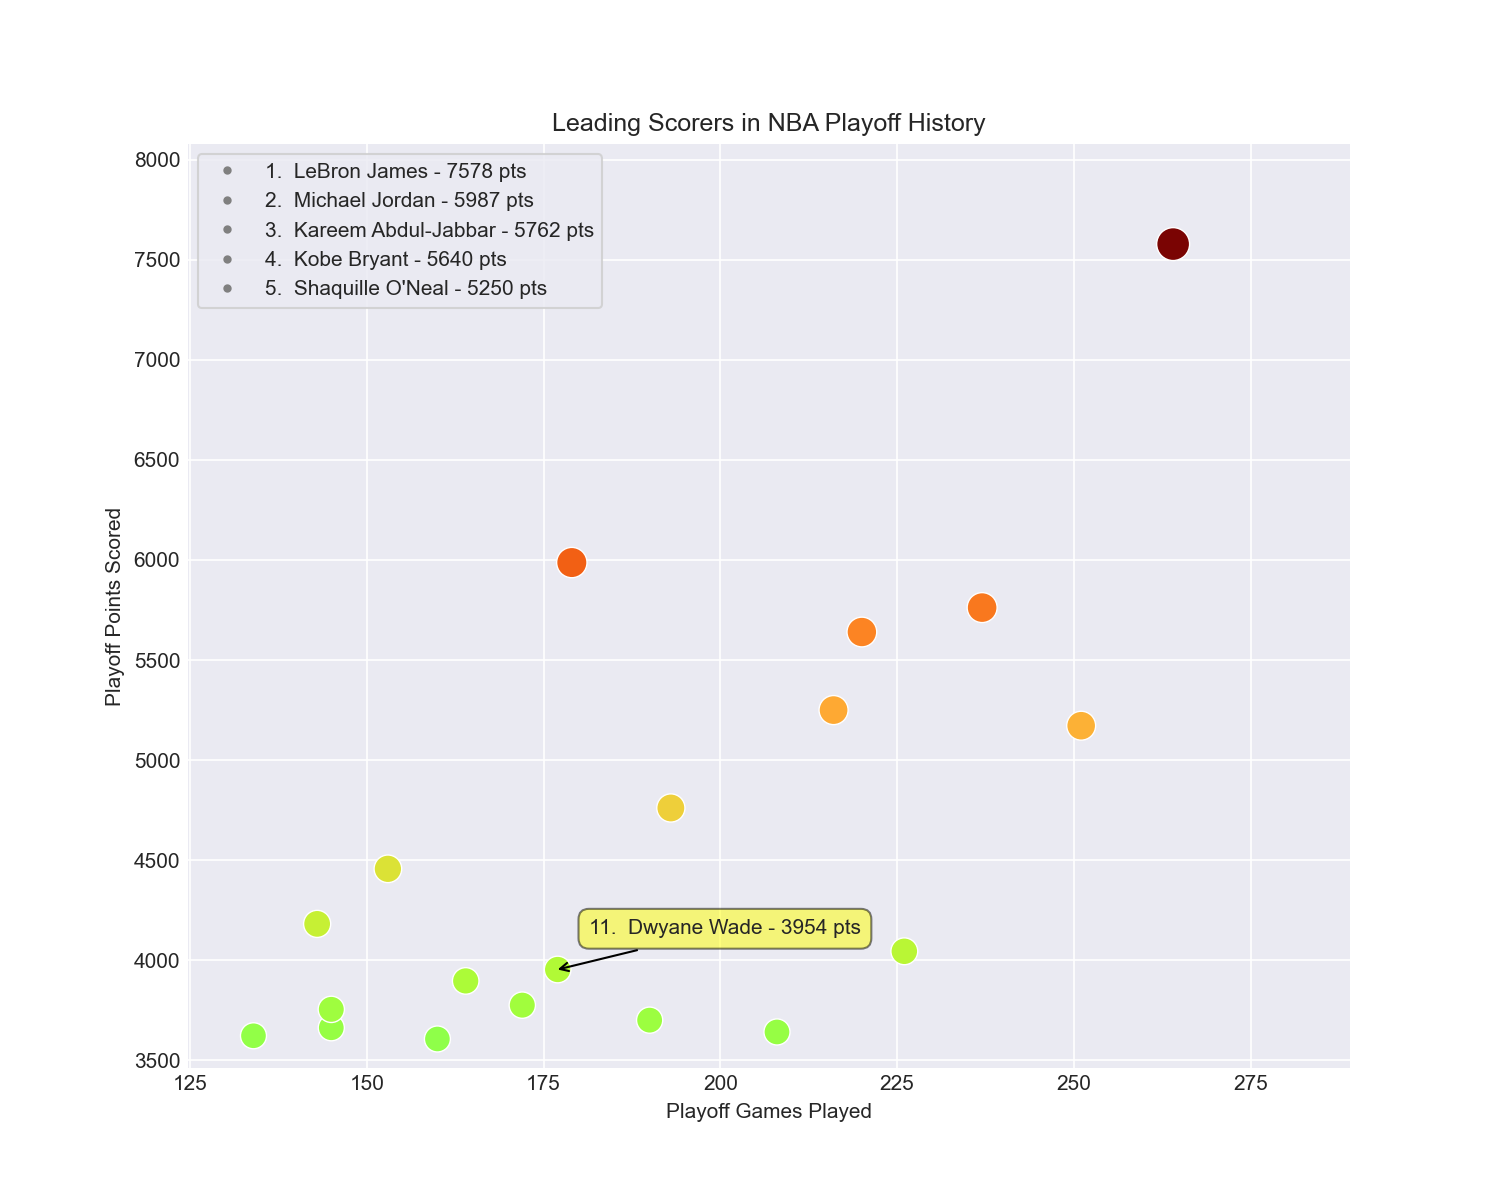

In [52]:
graph_it(playoff_data_DF)

In [53]:
playoff_data_DF.loc[:, :'Playoff Points Scored'].sort_values('Playoff Points Scored', ascending = False).head(20)

,Player Name,Playoff Games Played,Playoff Points Scored
1174,LeBron James,264,7578
1277,Michael Jordan,179,5987
2,Kareem Abdul-Jabbar,237,5762
323,Kobe Bryant,220,5640
1813,Shaquille O'Neal,216,5250
651,Tim Duncan,251,5172
1510,Karl Malone,193,4761
2569,Jerry West,153,4457
657,Kevin Durant,143,4182
1875,Tony Parker,226,4045
